In [1]:
import tensorflow
import keras
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import shutil

from IPython.display import Image
from keras.preprocessing.image import ImageDataGenerator
from keras import layers
from keras import models
from keras import optimizers
from keras.models import Model
from keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPool2D
from keras.utils import plot_model

%matplotlib inline

Using TensorFlow backend.


In [2]:
ROOT_DIR = os.getcwd()
DATA_PATH = os.path.join(ROOT_DIR, "dataset")

In [3]:
orig_dataset = os.path.join(DATA_PATH, "train")

save_small_data = os.path.join(DATA_PATH, "small_data")
if not os.path.exists(save_small_data):
    os.mkdir(save_small_data)

In [4]:
small_train_data = os.path.join(save_small_data, "train")
if not os.path.exists(small_train_data):
    os.mkdir(small_train_data)
    
small_validation_data = os.path.join(save_small_data, "validation")
if not os.path.exists(small_validation_data):
    os.mkdir(small_validation_data)

small_test_data = os.path.join(save_small_data, "test")
if not os.path.exists(small_test_data):
    os.mkdir(small_test_data)

In [5]:
train_dogs_data = os.path.join(small_train_data, 'dogs')
if not os.path.exists(train_dogs_data):
    os.mkdir(train_dogs_data)

train_cats_data = os.path.join(small_train_data, 'cats')
if not os.path.exists(train_cats_data):
    os.mkdir(train_cats_data)

In [6]:
validation_dogs_data = os.path.join(small_validation_data, 'dogs')
if not os.path.exists(validation_dogs_data):
    os.mkdir(validation_dogs_data)
    
validation_cats_data = os.path.join(small_validation_data, 'cats')
if not os.path.exists(validation_cats_data):
    os.mkdir(validation_cats_data)

In [7]:
test_dogs_data = os.path.join(small_test_data, 'dogs')
if not os.path.exists(test_dogs_data):
    os.mkdir(test_dogs_data)
    
test_cats_data = os.path.join(small_test_data, 'cats')
if not os.path.exists(test_cats_data):
    os.mkdir(test_cats_data)

In [8]:
mv_cats = ["cat.{}.jpg".format(i) for i in range(1000)]
for mv_cat in mv_cats:
    src = os.path.join(orig_dataset, mv_cat)
    des = os.path.join(train_cats_data, mv_cat)
    if not os.path.exists(des):
        shutil.copyfile(src, des)
print("報告班長，訓練的貓咪已全部複製完畢")

mv_cats = ["cat.{}.jpg".format(i) for i in range(1000, 1500)]
for mv_cat in mv_cats:
    src = os.path.join(orig_dataset, mv_cat)
    des = os.path.join(validation_cats_data, mv_cat)
    if not os.path.exists(des):
        shutil.copyfile(src, des)
print("報告班長，驗證的貓咪已全部複製完畢")

mv_cats = ["cat.{}.jpg".format(i) for i in range(1500, 2000)]
for mv_cat in mv_cats:
    src = os.path.join(orig_dataset, mv_cat)
    des = os.path.join(test_cats_data, mv_cat)
    if not os.path.exists(des):
        shutil.copyfile(src, des)
print("報告班長，測試的貓咪已全部複製完畢")

報告班長，訓練的貓咪已全部複製完畢
報告班長，驗證的貓咪已全部複製完畢
報告班長，測試的貓咪已全部複製完畢


In [9]:
mv_dogs = ["dog.{}.jpg".format(i) for i in range(1000)]
for mv_dog in mv_dogs:
    src = os.path.join(orig_dataset, mv_dog)
    des = os.path.join(train_dogs_data, mv_dog)
    if not os.path.exists(des):
        shutil.copyfile(src, des)
print("報告班長，訓練的狗狗已全部複製完畢")

mv_dogs = ["dog.{}.jpg".format(i) for i in range(1000, 1500)]
for mv_dog in mv_dogs:
    src = os.path.join(orig_dataset, mv_dog)
    des = os.path.join(validation_dogs_data, mv_dog)
    if not os.path.exists(des):
        shutil.copyfile(src, des)
print("報告班長，驗證的狗狗已全部複製完畢")

mv_dogs = ["dog.{}.jpg".format(i) for i in range(1500, 2000)]
for mv_dog in mv_dogs:
    src = os.path.join(orig_dataset, mv_dog)
    des = os.path.join(test_dogs_data, mv_dog)
    if not os.path.exists(des):
        shutil.copyfile(src, des)
print("報告班長，測試的狗狗已全部複製完畢")

報告班長，訓練的狗狗已全部複製完畢
報告班長，驗證的狗狗已全部複製完畢
報告班長，測試的狗狗已全部複製完畢


In [10]:
print('報告班長 訓練貓咪集，應到1000隻，實到', len(os.listdir(train_cats_data)),'隻，報告完畢。')
print('報告班長 訓練狗狗集，應到1000隻，實到', len(os.listdir(train_dogs_data)),'隻，報告完畢。')
print('報告班長 驗證貓咪集，應到500 隻，實到', len(os.listdir(validation_cats_data)),' 隻，報告完畢。')
print('報告班長 驗證狗狗集，應到500 隻，實到', len(os.listdir(validation_dogs_data)),' 隻，報告完畢。')
print('報告班長 測試貓咪集，應到500 隻，實到', len(os.listdir(test_cats_data)),' 隻，報告完畢。')
print('報告班長 測試狗狗集，應到500 隻，實到', len(os.listdir(test_dogs_data)),' 隻，報告完畢。')

報告班長 訓練貓咪集，應到1000隻，實到 1000 隻，報告完畢。
報告班長 訓練狗狗集，應到1000隻，實到 1000 隻，報告完畢。
報告班長 驗證貓咪集，應到500 隻，實到 500  隻，報告完畢。
報告班長 驗證狗狗集，應到500 隻，實到 500  隻，報告完畢。
報告班長 測試貓咪集，應到500 隻，實到 500  隻，報告完畢。
報告班長 測試狗狗集，應到500 隻，實到 500  隻，報告完畢。


In [11]:
target_number = 126

In [12]:
train_datagen = ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1)

test_datagen = ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_directory(
        # 這是圖像資料的目錄
        small_train_data,
        # 所有的圖像大小會被轉換成150x150
        target_size=(target_number, target_number),
        batch_size=32,
        # 由於這是一個二元分類問題, y的lable值也會被轉換成二元的標籤
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        small_validation_data,
        target_size=(target_number, target_number),
        batch_size=32,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, 126, 126, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 124, 124, 32)      896       
_________________________________________________________________
batch_normalization_1 (Batch (None, 124, 124, 32)      128       
_________________________________________________________________
pool1 (MaxPooling2D)         (None, 62, 62, 32)        0         
_________________________________________________________________
drop1 (Dropout)              (None, 62, 62, 32)        0         
_________________________________________________________________
conv2 (Conv2D)               (None, 60, 60, 64)        18496     
_________________________________________________________________
batch_normalization_2 (Batch (None, 60, 60, 64)        256       
__________

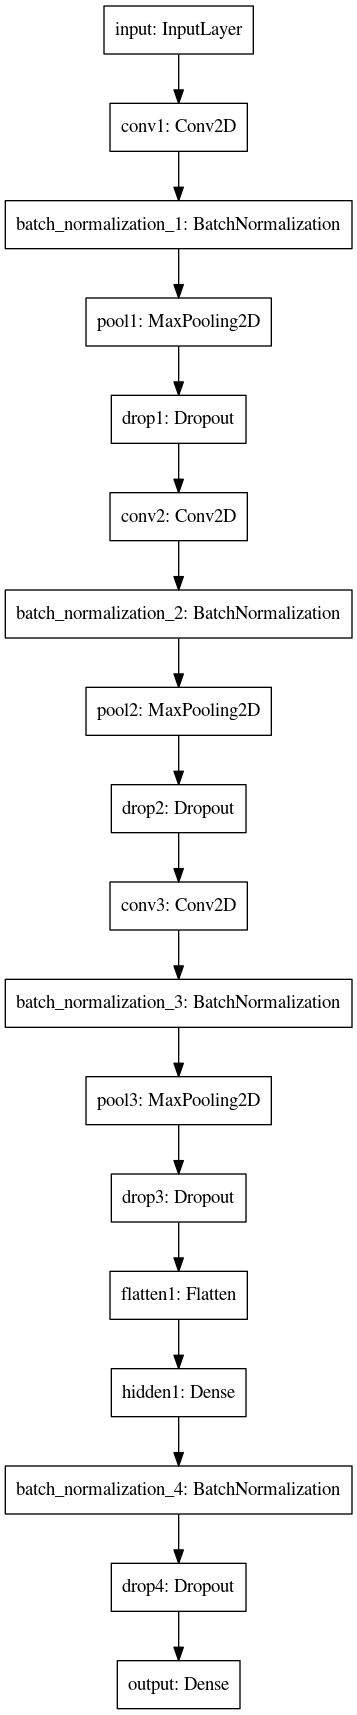

In [13]:
image_input = Input(shape=(target_number, target_number, 3), name='input')

conv1 = Conv2D(32, kernel_size=3, activation='relu', name='conv1')(image_input)
bn1 = BatchNormalization()(conv1)
pool1 = MaxPool2D(pool_size=(2, 2), name='pool1')(bn1)
drop1 = Dropout(0.25, name='drop1')(pool1)

conv2 = Conv2D(64, kernel_size=3, activation='relu', name='conv2')(drop1)
bn2 = BatchNormalization()(conv2)
pool2 = MaxPool2D(pool_size=(2, 2), name='pool2')(bn2)
drop2 = Dropout(0.25, name='drop2')(pool2)

conv3 = Conv2D(128, kernel_size=3, activation='relu', name='conv3')(drop2)
bn3 = BatchNormalization()(conv3)
pool3 = MaxPool2D(pool_size=(2, 2), name='pool3')(bn3)
drop3 = Dropout(0.25, name='drop3')(pool3)

flatten1 = Flatten(name='flatten1')(drop3)

hidden1 = Dense(512, activation='relu', name='hidden1')(flatten1)
bn3 = BatchNormalization()(hidden1)
drop4 = Dropout(0.5, name='drop4')(bn3)
output = Dense(1, activation='sigmoid', name='output')(drop4)
model = Model(inputs=image_input, outputs=output)

model.summary()

plot_model(model, to_file='convolutional_neural_network_1.png')

Image('convolutional_neural_network_1.png')

In [14]:
model.compile(loss='binary_crossentropy',
              optimizer="adadelta",
              metrics=['acc'])

In [15]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
earlystop = EarlyStopping(patience=20)
#learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            #patience=2, 
                                            #verbose=1, 
                                            #factor=0.5, 
                                            #min_lr=0.00001)
#callbacks = [earlystop, learning_rate_reduction]
callbacks = [earlystop]

In [16]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=50,
      validation_data=validation_generator,
      validation_steps=50,
      callbacks=callbacks)

Epoch 1/50
100/100 [==============================] - 247s 2s/step - loss: 0.9879 - acc: 0.5841 - val_loss: 0.9285 - val_acc: 0.6155
Epoch 2/50
100/100 [==============================] - 269s 3s/step - loss: 0.7292 - acc: 0.6369 - val_loss: 0.6745 - val_acc: 0.6727
Epoch 3/50
100/100 [==============================] - 252s 3s/step - loss: 0.6729 - acc: 0.6528 - val_loss: 0.6159 - val_acc: 0.6796
Epoch 4/50
100/100 [==============================] - 212s 2s/step - loss: 0.6223 - acc: 0.6850 - val_loss: 0.5678 - val_acc: 0.6997
Epoch 5/50
100/100 [==============================] - 162s 2s/step - loss: 0.5876 - acc: 0.7038 - val_loss: 0.6235 - val_acc: 0.6802
Epoch 6/50
100/100 [==============================] - 151s 2s/step - loss: 0.5548 - acc: 0.7209 - val_loss: 0.5834 - val_acc: 0.7139
Epoch 7/50
100/100 [==============================] - 150s 2s/step - loss: 0.5212 - acc: 0.7444 - val_loss: 0.4764 - val_acc: 0.7563
Epoch 8/50
100/100 [==============================] - 147s 1s/step - 

In [17]:
model.save('cats_and_dogs_fix.h5')

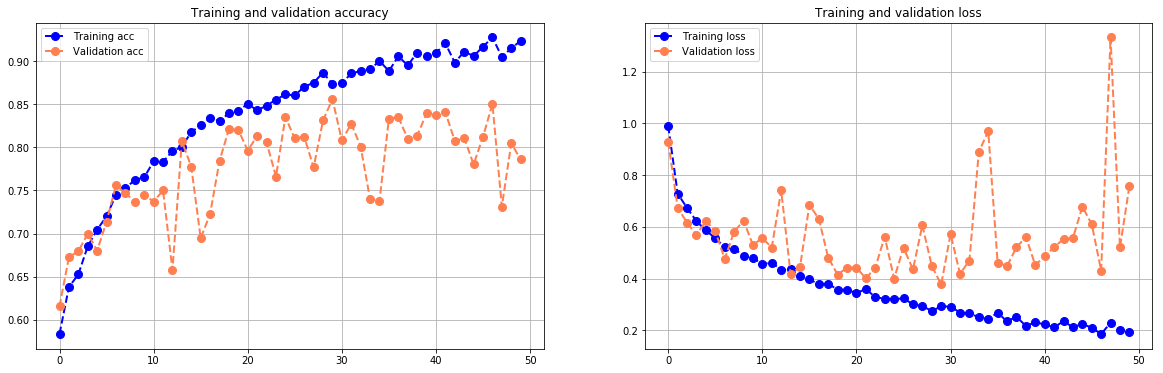

In [18]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.figure(figsize=(20,6))


plt.subplot(1,2,1)
plt.grid(True)
plt.rcParams['axes.facecolor'] = 'white'
plt.plot(epochs, acc, linewidth = '2', label = "Training acc", color='blue', linestyle='--', marker='o', markersize=8)
plt.plot(epochs, val_acc, linewidth = '2', label = "Validation acc", color='coral', linestyle='--', marker='o', markersize=8)
plt.title('Training and validation accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.grid(True)
plt.plot(epochs, loss, linewidth = '2', label = "Training loss", color='blue', linestyle='--', marker='o', markersize=8)
plt.plot(epochs, val_loss, linewidth = '2', label = "Validation loss", color='coral', linestyle='--', marker='o', markersize=8)
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [30]:
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [39]:
labels_batch = []
for data_batch, labels_batch in validation_generator:
    Y_pred = model.predict(data_batch)
    labels_batch = labels_batch
    break

In [43]:
confusion_matrix(labels_batch, Y_pred.round())

array([[10,  4],
       [ 4, 14]])

In [45]:
from sklearn.metrics import accuracy_score #works
accuracy_score(labels_batch, Y_pred.round(), normalize=False)

24

In [46]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

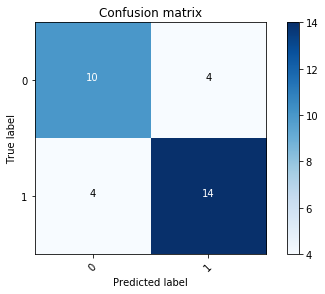

In [48]:
import itertools
confusion_mtx = confusion_matrix(labels_batch, Y_pred.round())
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(2)) 